# Regression on walmart sales and stores data


## Table of Contents
* [Questions](#ques)
* [Linear Regression](#linear)
    * [Handling Dummy Variable trap](#linear_dummy_trap)
    * [Model with all variables](#linear_all)
    * [Model with Backward Elimination](#linear_backward_elemination) 
* [Logistic Regression](#logistic)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a class='anchor' id='ques'></a>

## Regression Related Questions
- Do I need to scale my data for regression?
- How to do 'log' transformation on data?
- What we did does it make sense? the output of the model ?
- 
-



In [2]:
data = pd.read_pickle('data/dummified_data_all.pkl')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,day_name,isWeekend,quarter,...,March,April,May,June,July,August,September,October,November,Dec
0,1,1,2010-12-02,46039.49,True,A,151315.0,Thursday,0,4,...,0,0,0,0,0,0,0,0,0,1
1,1,1,2010-02-19,41595.55,False,A,151315.0,Friday,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,2010-02-26,19403.54,False,A,151315.0,Friday,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,2010-05-03,21827.90,False,A,151315.0,Monday,0,2,...,0,0,1,0,0,0,0,0,0,0
4,1,1,2010-12-03,21043.39,False,A,151315.0,Friday,0,4,...,0,0,0,0,0,0,0,0,0,1


In [3]:
data.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'day_name', 'isWeekend', 'quarter', 'month', 'is_not_holiday',
       'is_holiday', 'Type_A', 'Type_B', 'Type_C', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'is_not_weekend', 'is_weekend', 'quarter_1', 'quarter_2', 'quarter_3',
       'quarter_4', 'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'Dec'],
      dtype='object')

<a class='anchor' id='linear'></a>
## Linear Regression 
 **Predict Weekly Sales given the dataset of sales in different stores and department.**


In [4]:
linear_reg_data = data[['Weekly_Sales','Size', 'is_not_holiday','is_holiday', 'Type_A', 'Type_B', 'Type_C', 
      'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
      'is_not_weekend', 'is_weekend', 'quarter_1', 'quarter_2', 'quarter_3','quarter_4', 
      'Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 
      'November', 'Dec']]

linear_reg_data.describe()

,Weekly_Sales,Size,is_not_holiday,is_holiday,Type_A,Type_B,Type_C,Friday,Monday,Saturday,...,March,April,May,June,July,August,September,October,November,Dec
count,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,...,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000,421568.000000
mean,15981.229443,136727.925037,0.929641,0.070359,0.511132,0.387824,0.101044,0.671263,0.077432,0.041856,...,0.083991,0.097887,0.090645,0.083896,0.090431,0.083588,0.091086,0.090930,0.063062,0.077475
std,22711.232698,60980.717180,0.255751,0.255751,0.499877,0.487255,0.301388,0.469755,0.267277,0.200259,...,0.277375,0.297162,0.287104,0.277233,0.286799,0.276769,0.287732,0.287509,0.243075,0.267344
min,-4988.940000,34875.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2079.632500,93638.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7612.020000,140167.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,20205.837500,202505.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,693099.360000,219622.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


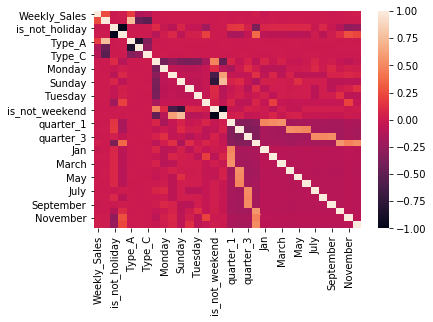

In [5]:
sns.heatmap(linear_reg_data.corr())

<a class='anchor' id='linear_dummy_trap'></a>
### Handling Dummy Variable trap



In [6]:
dummy_to_remove = ['is_holiday', 'Type_C', 'Friday', 'is_weekend', 'quarter_4', 'Dec']
final_col = (col for col in linear_reg_data.columns if col not in dummy_to_remove)

linear_reg_data = linear_reg_data[final_col]

linear_reg_data.head(2)

,Weekly_Sales,Size,is_not_holiday,Type_A,Type_B,Monday,Saturday,Sunday,Thursday,Tuesday,...,Feb,March,April,May,June,July,August,September,October,November
0,46039.49,151315.0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,41595.55,151315.0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [12]:
X = linear_reg_data.iloc[:, 1:].values
y = linear_reg_data.iloc[:, 1].values

<a class='anchor' id='linear_all'></a>
### Model with all variables

- Remember sklearn add a varaible for x0 

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=True)

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
#prediction
y_pred = lr.predict(X_test)

In [33]:
#evaluation
print (mean_squared_error(y_test, y_pred) , mean_squared_error(y_train, lr.predict(X_train)))

1.3623535314459102e-18 1.3607110903510527e-18


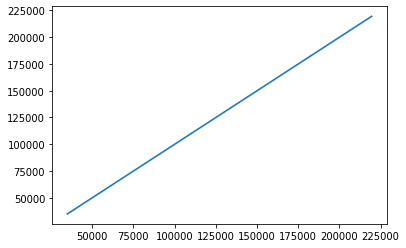

In [34]:
sns.lineplot(y_test, y_pred)
plt.show()

In [40]:
from yellowbrick.regressor import ResidualsPlot,PredictionError

In [ ]:
plt.figure(figsize=(14, 6))

regr = LinearRegression()

visualizer = ResidualsPlot(regr)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.poof()

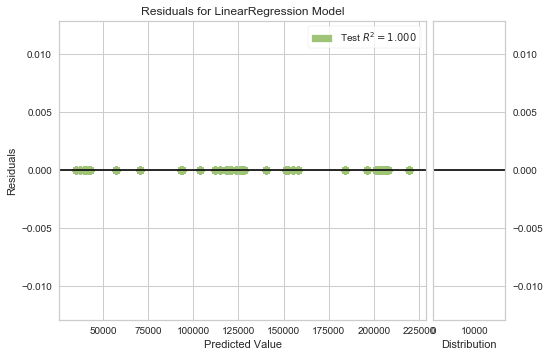

In [62]:
regressor = LinearRegression()

viz = ResidualsPlot(lr)
#viz.fit(X_train,y_train)
viz.score(X_test,y_test)
viz.poof()

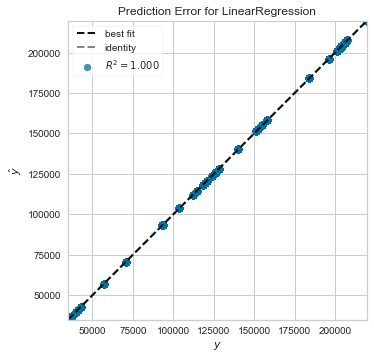

In [44]:
viz = PredictionError(regressor)
viz.fit(X_train, y_train)
viz.score(X_test,y_test)
viz.poof()

In [50]:
from sklearn.metrics import auc, roc_curve

In [59]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label=2)


/Users/adeela/anaconda3/lib/python3.7/site-packages/sklearn/metrics/ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [55]:
auc(fpr, tpr)

nan

In [57]:
y_pred

array([184109., 114533.,  93188., ...,  39690., 103681., 207499.])

<a class='anchor' id='linear_backward_elemination'></a>
### Model with Backward Elimination



In [27]:
import statsmodels.api as sm

In [ ]:
sm.OLS()

<a class='anchor' id='logistic'></a>
## Logistic Regression
 **Predict Weekly Sales given the dataset of sales in different stores and department.**